## Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check 
out the price of the same flight tomorrow, it will be a different story. We might have often 
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will 
try to use machine learning to solve this problem. This can help airlines by predicting 
what prices they can maintain.


## Task1: Data Analysis Report

### 1.Data Understanding

- __Dataset Description:__
This dataset contains information about flight tickets, including details such as the airline, date of journey, source, destination, route, departure time, arrival time, duration, number of stops, additional information, and price.
- __Data Size:__
Number of observations (rows): 10462
Number of variables (columns): 11
- __Variable Description:__
    - Airline: The name of the airline.
    - Date_of_Journey: The date of the flight journey.
    - Source: The departure city.
    - Destination: The destination city.
    - Route: The route of the flight.
    - Dep_Time: The departure time.
    - Arrival_Time: The arrival time.
    - Duration: The duration of the flight.
    - Total_Stops: The total number of stops during the flight.
    - Additional_Info: Additional information about the flight.
    - Price: The price of the flight ticket.



- importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import warnings
warnings.filterwarnings('ignore')
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error, r2_score
from math import sqrt

In [2]:
fare=pd.read_excel("Flight_Fare.xlsx")
fare.head(15)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


### 2.Exploratory Data Analysis

- check all the columns

In [3]:
fare.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

- list the number of rows and columns

In [4]:
fare.shape

(10683, 11)

- List the train data inforamation

In [5]:
fare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- Lists the number of null values in our dataset

# Flight Price Prediction



In [6]:
fare.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- Removing null values and unwanted columns

In [7]:
fare['Route'] = fare['Route'].fillna(fare['Route'].mode()[0])
fare['Total_Stops'] = fare['Total_Stops'].fillna(fare['Total_Stops'].mode()[0])

fare=fare.drop(['Date_of_Journey','Route','Arrival_Time','Dep_Time','Additional_Info'],axis=1)

In [8]:
fare.isnull().sum()

Airline        0
Source         0
Destination    0
Duration       0
Total_Stops    0
Price          0
dtype: int64

In [9]:
fare.head(5)

,Airline,Source,Destination,Duration,Total_Stops,Price
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302


In [10]:
fare['Total_Stops'].value_counts()

Total_Stops
1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

### 3.Data Visualization using ML

- Plotting Price vs Airline plot

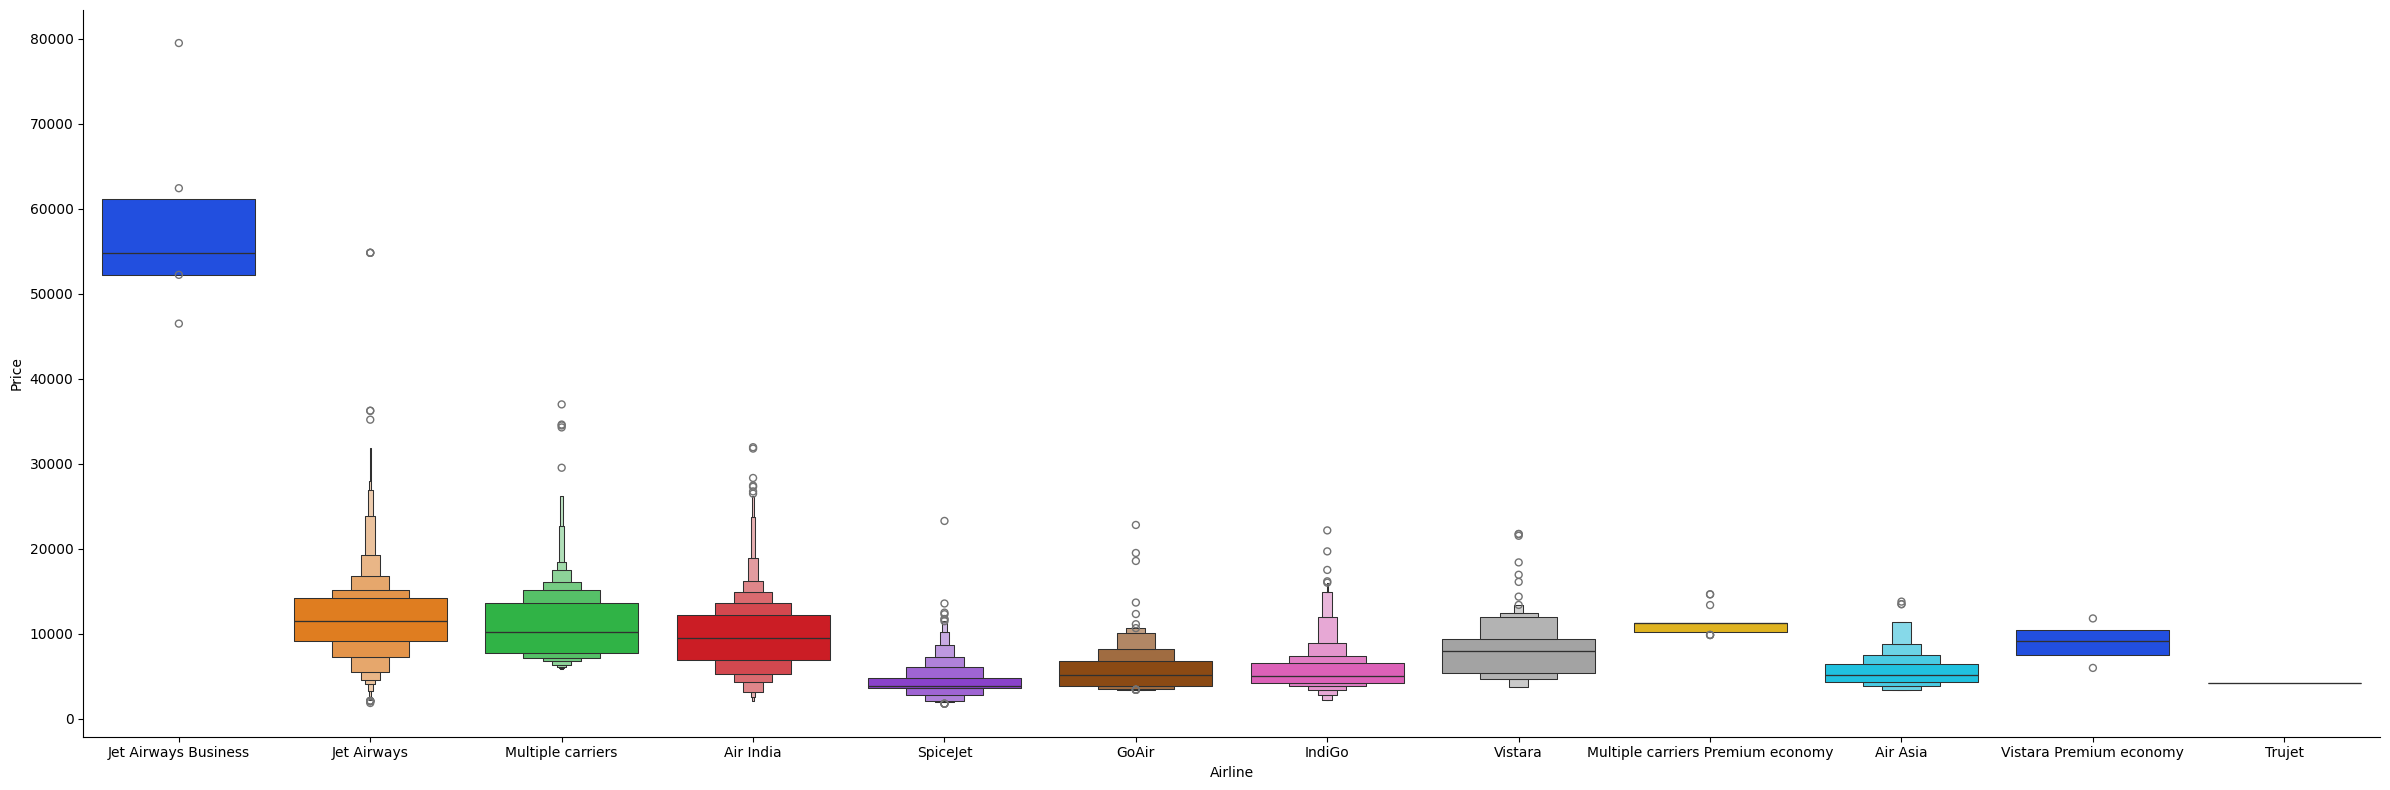

In [11]:
sns.catplot(y = "Price", x = "Airline", data = fare.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3,palette='bright')
plt.show()

In [12]:
fare.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price'], dtype='object')

- Plotting Bar chart for Types of Airline vs Number of Flights

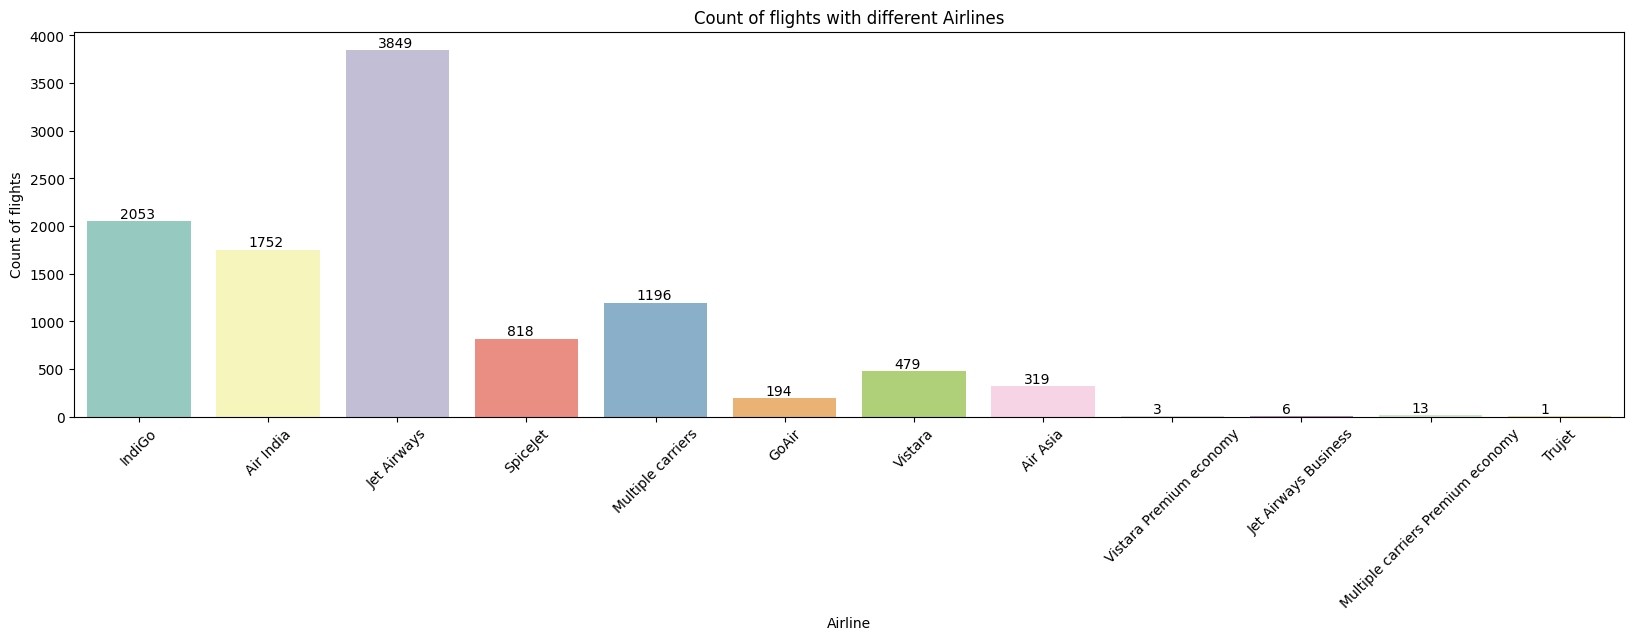

In [13]:
plt.figure(figsize=(20, 5))
plt.title('Count of flights with different Airlines')
ax = sns.countplot(x='Airline', data=fare, palette="Set3")
plt.ylabel('Count of flights')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), va='bottom', color='black')
plt.show()


- Plotting Bar chart for source vs Number of Flights

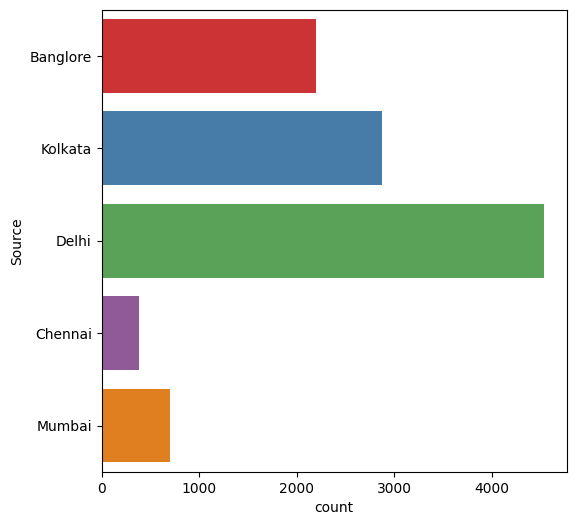

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(fare['Source'],palette='Set1')
plt.show()

- Barplot for Types of Airline vs Price

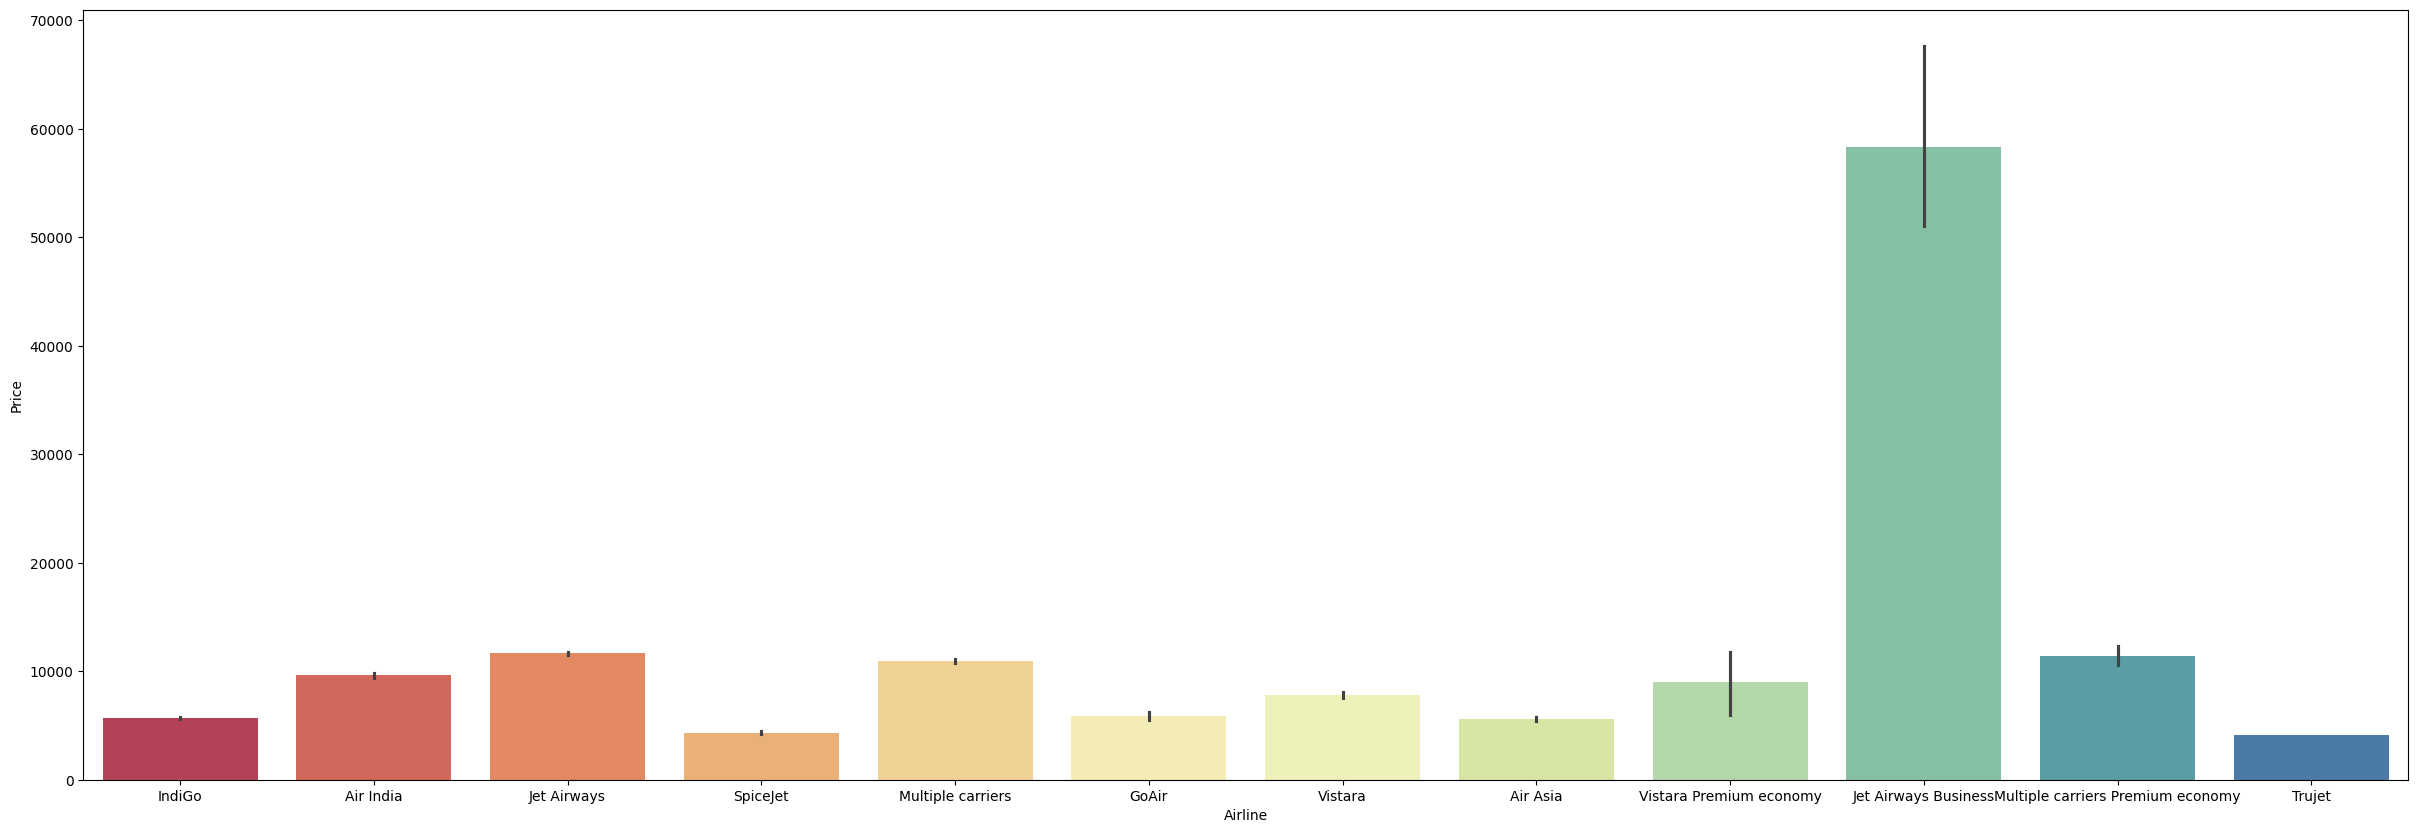

In [15]:
plt.figure(figsize=(30,10))
sns.barplot(x="Airline",y='Price', data=fare,palette='Spectral')
plt.show()

- Distribution plot of Density vs price

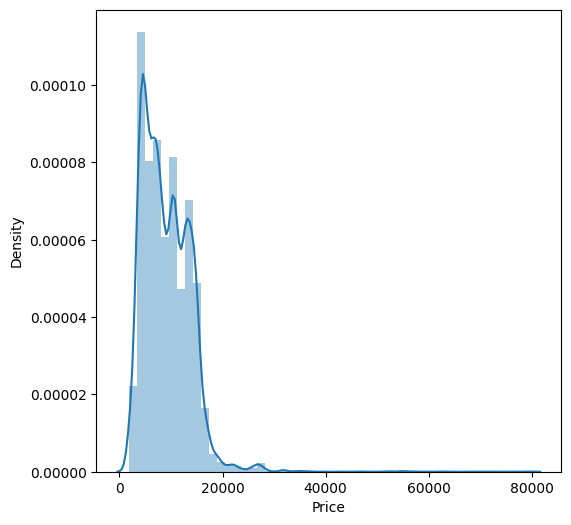

In [16]:
plt.figure(figsize=(6,6))
sns.distplot(fare['Price'])
plt.show()

- Interprting value of skewness

In [17]:
fare['Price'].skew()

1.8125523782189141

In [18]:
fare['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

- Barplot for Price vs Source

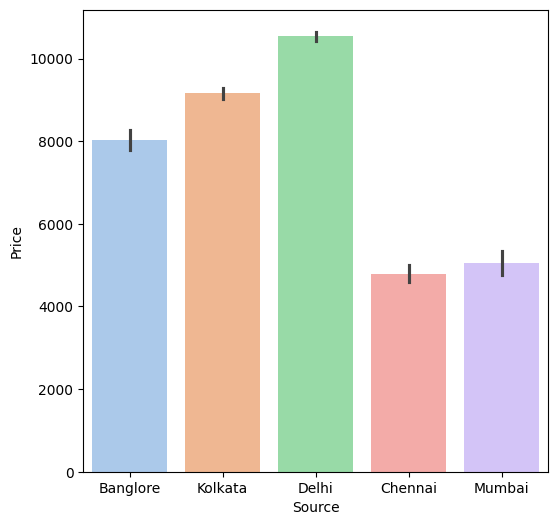

In [19]:
plt.figure(figsize=(6,6))
sns.barplot(x="Source",y='Price', data=fare,palette='pastel')
plt.show()

- Barplot for price vs destination

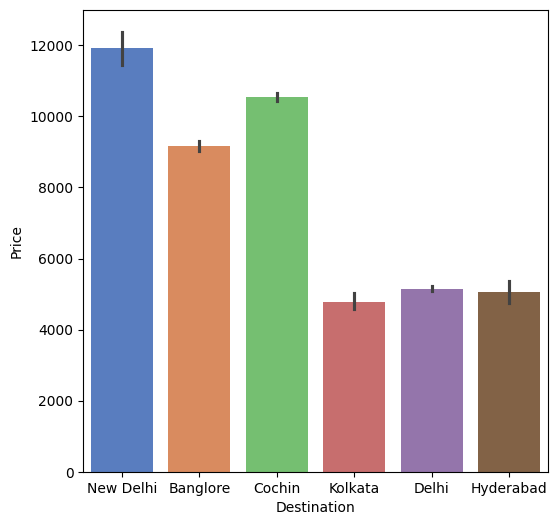

In [20]:
plt.figure(figsize=(6,6))
sns.barplot(x="Destination",y='Price', data=fare,palette='muted')
plt.show()

- Barplot for price vs total stops`m

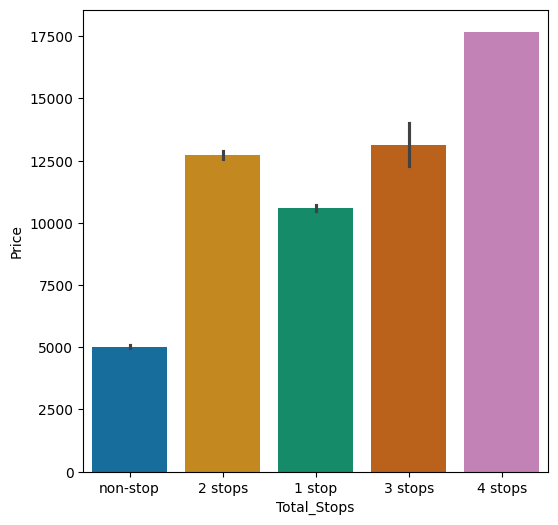

In [21]:
plt.figure(figsize=(6,6))
sns.barplot(x="Total_Stops",y='Price', data=fare,palette='colorblind')
plt.show()

## 4.Feature Engineering

- Time taken by plane to reach destination is called Duration. It is the differnce between Departure Time and Arrival time. Assigning and converting Duration column into list

In [22]:
duration = list(fare["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  

- Adding duration_hours and duration_mins list to train_data dataframe

In [23]:
fare["Duration_hours"] = duration_hours
fare["Duration_mins"] = duration_mins
fare=fare.drop(['Duration'],axis=1)

In [24]:
fare.replace({'Total_Stops':{'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}},inplace=True)

- As Source, Airline, Destination is Nominal Categorical data we will perform OneHotEncoding

In [25]:
Airline = fare[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first= True)
Source = fare[["Source"]]
Source = pd.get_dummies(Source, drop_first= True)
Destination = fare[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first= True)

- Concatenate dataframe --> fare + Airline + Source + Destination

In [26]:
fare = pd.concat([fare, Airline, Source, Destination], axis = 1)

In [27]:
fare=fare.drop(['Airline','Source','Destination'],axis=1)

In [28]:
fare.head(5)

,Total_Stops,Price,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,7,25,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,19,0,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,5,25,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,4,45,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True


### 5.Finding co-relation

<Axes: >

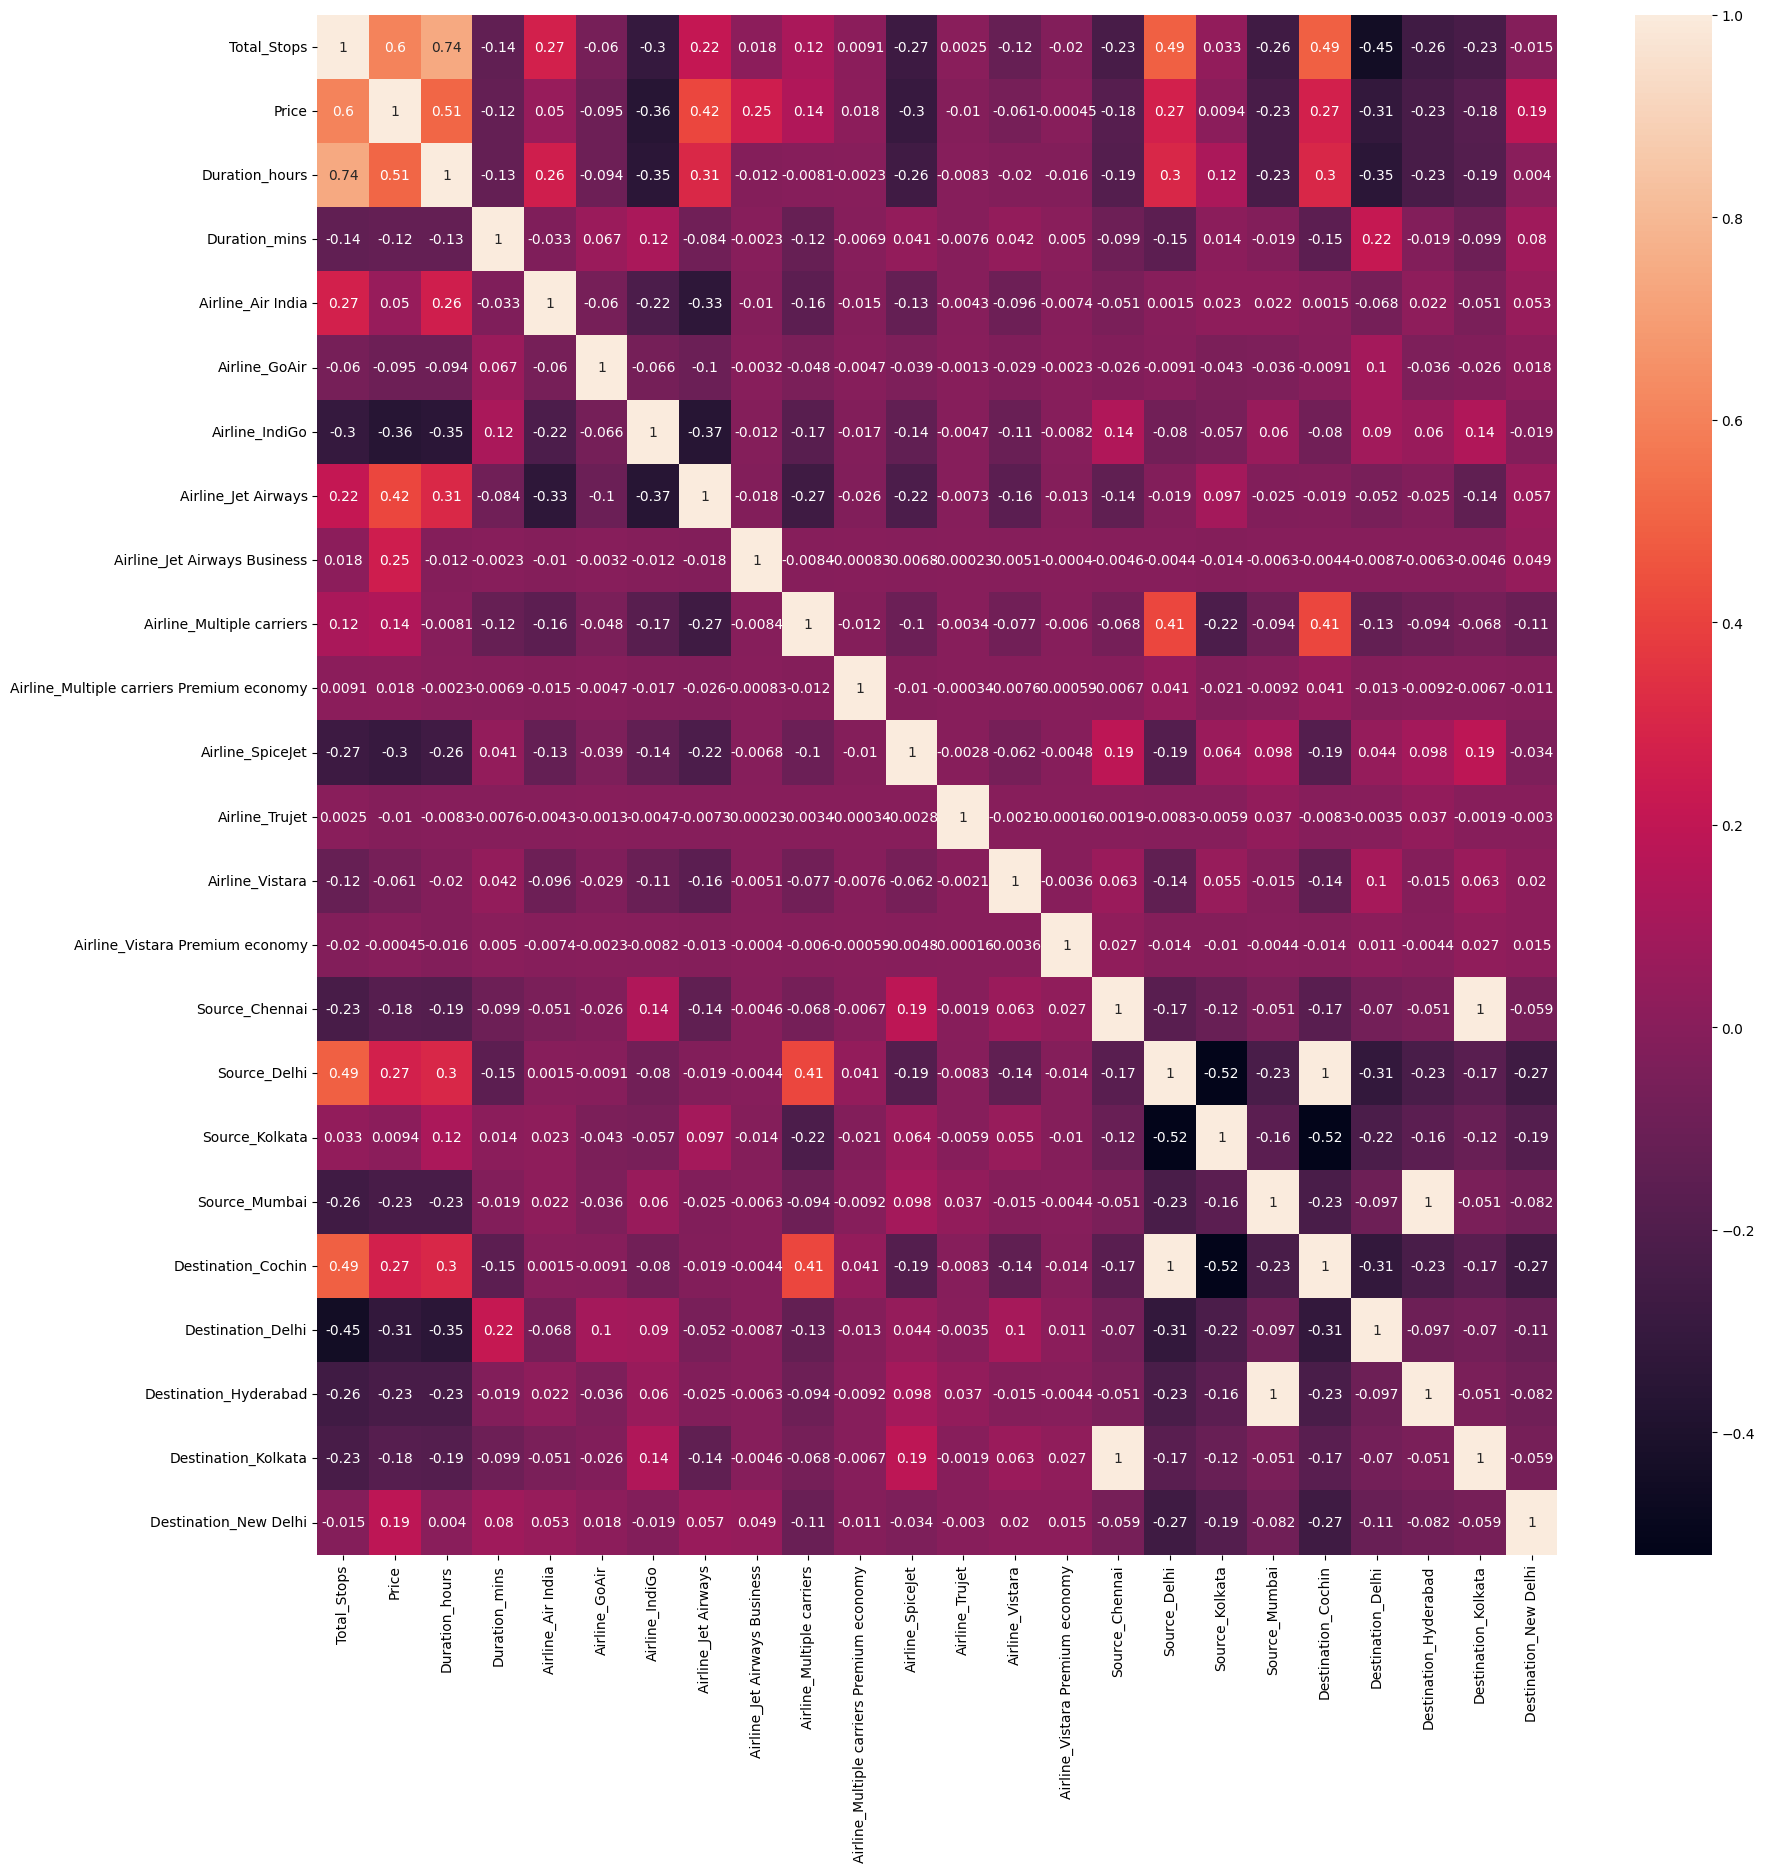

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(fare.corr(),annot=True)

- Spliting data by train_test_split

In [30]:
x=fare.drop('Price',axis=1)
y=fare['Price']

- Scaling Data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Task2: Model Building

In [33]:
#importing Libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

### 1.Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error, r2_score
from math import sqrt
params = {}
# Initialize the GridSearchCV object
linear_regressor = GridSearchCV(LinearRegression(), params, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
# Fit the model
linear_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1, param_grid={},
             scoring='neg_mean_absolute_error')

In [35]:
# Predict train and test results
y_train_pred = linear_regressor.predict(x_train)
y_test_pred = linear_regressor.predict(x_test)

In [36]:
# Print train results
print("Train Results for Linear Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred) * 100, 2))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Linear Regression Model:
Root Mean Squared Error:  2878.054719572994
Mean Absolute % Error:  23.28
R-Squared:  0.6107597930693576


In [37]:
# Print test results
print("Test Results for Linear Regression Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Linear Regression Model:
Root Mean Squared Error:  3113.764897867179
Mean Absolute % Error:  23.95
R-Squared:  0.5420969684943684


### 2.Ridge Regression

In [38]:
# Performing GridSearchCV on Ridge Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor = GridSearchCV(Ridge(), params, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
ridge_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [39]:
# Predicting train and test results
y_train_pred = ridge_regressor.predict(x_train)
y_test_pred = ridge_regressor.predict(x_test)

In [40]:
print("Train Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred) * 100, 2))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
Root Mean Squared Error:  2876.8741246906898
Mean Absolute % Error:  23.07
R-Squared:  0.611079064792159


In [41]:
print("Test Results for Ridge Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
Root Mean Squared Error:  3111.8085333557706
Mean Absolute % Error:  0
R-Squared:  0.5426721845741875


### 3.Lasso Regression

In [42]:
# Performing GridSearchCV on Lasso Regression
params = {'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor = GridSearchCV(Lasso(), params ,cv = 15,scoring = 'neg_mean_absolute_error', n_jobs = -1)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [43]:
# Predicting train and test results
y_train_pred = lasso_regressor.predict(x_train)
y_test_pred = lasso_regressor.predict(x_test)

In [44]:
print("Train Results for Lasso Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
Root Mean Squared Error:  2876.8741246908894
Mean Absolute % Error:  0
R-Squared:  0.6110790647921049


In [45]:
print("Test Results for Lasso Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
Root Mean squared Error:  3111.808520187258
Mean Absolute % Error:  0
R-Squared:  0.5426721884448158


### 4.KNeighbors Regressor

In [46]:
knn = KNeighborsRegressor(n_neighbors=10)
dt = DecisionTreeRegressor(max_depth = 3)
rf = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)

In [47]:
# Define the parameter grid for KNeighborsRegressor
knn_params = {'n_neighbors': [5, 10, 15, 20], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
# Initialize the GridSearchCV object for KNeighborsRegressor
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# Fit the model
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [48]:
# Print the best parameters
print("Best parameters for KNeighborsRegressor:", knn_grid.best_params_)

# Predict train and test results
y_train_pred = knn_grid.predict(x_train)
y_test_pred = knn_grid.predict(x_test)

Best parameters for KNeighborsRegressor: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


In [78]:
# Print train results
print("Train Results for KNeighborsRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train, y_train_pred))

Train Results for KNeighborsRegressor Model:
Root Mean Squared Error:  2739.5064252639795
Mean Absolute % Error:  0
R-Squared:  0.6473334673577822


In [79]:
# Print test results
print("Test Results for KNeighborsRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for KNeighborsRegressor Model:
Root Mean Squared Error:  2976.275238756619
Mean Absolute % Error:  0
R-Squared:  0.5816420132980991


### 5.DecisionTree Regression

In [51]:
# Performing GridSearchCV on Decision Tree Regression
depth = list(range(3,30))
param_grid = dict(max_depth = depth)
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [52]:
# Predicting train and test results
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

In [53]:
print("Train Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
Root Mean squared Error:  2653.4732629617984
Mean Absolute % Error:  0
R-Squared:  0.6691363678279765


In [54]:
print("Test Results for Decision Tree Regressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
Root Mean Squared Error:  2954.0547122819007
Mean Absolute % Error:  0
R-Squared:  0.5878655188837738


### 6.Random Forest Regression

In [59]:
# Fit the model
rf.fit(x_train, y_train)
# Predict train and test results
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [81]:
# Print train results
print("Train Results for RandomForestRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-Squared: ", r2_score(y_train, y_train_pred))

Train Results for RandomForestRegressor Model:
Root Mean Squared Error:  2739.5064252639795
Mean Absolute % Error:  0
R-Squared:  0.6473334673577822


In [80]:
# Print test results
print("Test Results for RandomForestRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-Squared: ", r2_score(y_test, y_test_pred))

Test Results for RandomForestRegressor Model:
Root Mean Squared Error:  2976.275238756619
Mean Absolute % Error:  0
R-Squared:  0.5816420132980991


### 7.AdaBoost Regression

In [62]:
# Fit the model
ada.fit(x_train, y_train)
# Predict train and test results
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

In [63]:
# Print train results
print("Train Results for AdaBoostRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2))
print("R-Squared: ", r2_score(y_train, y_train_pred))

Train Results for AdaBoostRegressor Model:
Root Mean Squared Error:  3095.980964553222
Mean Absolute % Error:  27.33
R-Squared:  0.549581557231839


In [64]:
# Print test results
print("\nTest Results for AdaBoostRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))
print("R-Squared: ", r2_score(y_test, y_test_pred))


Test Results for AdaBoostRegressor Model:
Root Mean Squared Error:  3357.557194560815
Mean Absolute % Error:  27.66
R-Squared:  0.4675869147273125


### 8.GradientBoosting Regression

In [65]:
# Fit the model
gbr.fit(x_train, y_train)
# Predict train and test results
y_train_pred = gbr.predict(x_train)
y_test_pred = gbr.predict(x_test)

In [66]:
# Print train results
print("Train Results for GradientBoostingRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train, y_train_pred) * 100, 2))
print("R-Squared: ", r2_score(y_train, y_train_pred))

Train Results for GradientBoostingRegressor Model:
Root Mean Squared Error:  2739.5064252639795
Mean Absolute % Error:  21.14
R-Squared:  0.6473334673577822


In [67]:
# Print test results
print("\nTest Results for GradientBoostingRegressor Model:")
print("Root Mean Squared Error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_test, y_test_pred) * 100, 2))
print("R-Squared: ", r2_score(y_test, y_test_pred))


Test Results for GradientBoostingRegressor Model:
Root Mean Squared Error:  2976.275238756619
Mean Absolute % Error:  21.77
R-Squared:  0.5816420132980991


In [75]:
# Calculate scores for Linear Regression
lr_score = round(linear_regressor.score(x_train, y_train) * 100, 2)
lr_score_test = round(linear_regressor.score(x_test, y_test) * 100, 2)

# Calculate scores for Ridge Regression
ridge_score = round(ridge_regressor.score(x_train, y_train) * 100, 2)
ridge_score_test = round(ridge_regressor.score(x_test, y_test) * 100, 2)

# Calculate scores for Lasso Regression
lasso_score = round(lasso_regressor.score(x_train, y_train) * 100, 2)
lasso_score_test = round(lasso_regressor.score(x_test, y_test) * 100, 2)

# Calculate scores for KNeighborsRegressor
knn_score = round(knn_grid.score(x_train, y_train) * 100, 2)
knn_score_test = round(knn_grid.score(x_test, y_test) * 100, 2)

# Calculate scores for Decision Tree Regressor
decision_score = round(tree.score(x_train, y_train) * 100, 2)
decision_score_test = round(tree.score(x_test, y_test) * 100, 2)

# # Calculate scores for Random Forest Regressor
rf_score = round(rf.score(x_train, y_train) * 100, 2)
rf_score_test = round(rf.score(x_test, y_test) * 100, 2)

# Calculate scores for AdaBoost Regressor
ada_score = round(ada.score(x_train, y_train) * 100, 2)
ada_score_test = round(ada.score(x_test, y_test) * 100, 2)

# Calculate scores for Gradient Boosting Regressor
gbr_score = round(gbr.score(x_train, y_train) * 100, 2)
gbr_score_test = round(gbr.score(x_test, y_test) * 100, 2)




In [76]:
# Creating a DataFrame to compare models
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'KNeighborsRegressor', 
              'Decision Tree Regressor', 'Random Forest Regressor', 'AdaBoost Regressor', 
              'Gradient Boosting Regressor'],
    'Score': [lr_score, ridge_score, lasso_score, knn_score, decision_score, rf_score, ada_score, gbr_score],
    'Test Score': [lr_score_test, ridge_score_test, lasso_score_test, knn_score_test, decision_score_test, 
                   rf_score_test, ada_score_test, gbr_score_test]
})

# Sorting the DataFrame by Test Score in descending order
models = models.sort_values(by='Test Score', ascending=False)

# Printing the sorted DataFrame
print(models)

                         Model         Score    Test Score
4      Decision Tree Regressor  6.691000e+01  5.879000e+01
7  Gradient Boosting Regressor  6.473000e+01  5.816000e+01
5      Random Forest Regressor  5.631000e+01  4.854000e+01
6           AdaBoost Regressor  5.496000e+01  4.676000e+01
1             Ridge Regression -1.965238e+05 -2.054086e+05
2             Lasso Regression -1.965238e+05 -2.054086e+05
0            Linear Regression -1.972463e+05 -2.063145e+05
3          KNeighborsRegressor -5.147058e+08 -9.965344e+08


In [82]:
x = PrettyTable()
x.field_names = ["Model Name", "Tr. RMSE", "Tr. MA%E", "Tr. R-Squared", "Te. RMSE", "Te. MA%E", "Te. R-Squared",]
x.add_row(['Linear Regression','2878.05','23','0.61','3113.76','24','0.54'])
x.add_row(['Ridge Regression','2876.87','23','0.61','3111.80','0','0.54'])
x.add_row(['Lasso Regression','2876.87','0','0.61','3111.80','0','0.54'])
x.add_row(['KNN Regressor','2739.50','0','0.64','2976.27','0','0.58'])
x.add_row(['Decision Tree Regressor','2653.47','0','0.66','2954.05','0','0.58'])
x.add_row(['Random Forest Regressor','3049.25','0','0.56','3300.94','0','0.48'])
x.add_row(['AdaBoost Regressor','3095.98', '27.33','0.54','3357.55','27.66','0.46'])
x.add_row(['Gradient Boosting Regressor','2739.5','21.14','0.64','2976.27','21','0.58'])
print(x)

+-----------------------------+----------+----------+---------------+----------+----------+---------------+
|          Model Name         | Tr. RMSE | Tr. MA%E | Tr. R-Squared | Te. RMSE | Te. MA%E | Te. R-Squared |
+-----------------------------+----------+----------+---------------+----------+----------+---------------+
|      Linear Regression      | 2878.05  |    23    |      0.61     | 3113.76  |    24    |      0.54     |
|       Ridge Regression      | 2876.87  |    23    |      0.61     | 3111.80  |    0     |      0.54     |
|       Lasso Regression      | 2876.87  |    0     |      0.61     | 3111.80  |    0     |      0.54     |
|        KNN Regressor        | 2739.50  |    0     |      0.64     | 2976.27  |    0     |      0.58     |
|   Decision Tree Regressor   | 2653.47  |    0     |      0.66     | 2954.05  |    0     |      0.58     |
|   Random Forest Regressor   | 3049.25  |    0     |      0.56     | 3300.94  |    0     |      0.48     |
|      AdaBoost Regressor   

- **Root Mean Squared Error (RMSE)**: Lower RMSE indicates better model performance.

Best Training RMSE: Decision Tree Regressor (2653.47)
Best Testing RMSE: Decision Tree Regressor (2954.05)
- **Mean Absolute Percentage Error (MA%E)**: Lower MA%E indicates better model performance. Since many of the values are 0, which may indicate missing or not calculated values, this metric is less useful in this comparison.

Best Training MA%E: Gradient Boosting Regressor (21.14)
Best Testing MA%E: Gradient Boosting Regressor (21)
- **R-Squared**: Higher R-Squared indicates better model performance.

Best Training R-Squared: Decision Tree Regressor (0.66)
Best Testing R-Squared: Decision Tree Regressor (0.58) and KNN Regressor (0.58)

**Therefore, the Decision Tree Regressor appears to be the best-performing model among the eight models.**